<a href="https://colab.research.google.com/github/Joel-Vijo/Digit-Classifier/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as dt
import pickle as cPickle
import gzip
import cv2
from torch.utils.data import Dataset, DataLoader

In [ ]:
num_epochs = 5
num_classes = 10
batch_size = 128
learning_rate = 0.001
DATA_PATH = 'C:\\Users\Andy\PycharmProjects\MNISTData'
MODEL_STORE_PATH = 'C:\\Users\Andy\PycharmProjects\pytorch_models\\'

In [ ]:
# transforms to apply to the data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
print(len(train_dataset))

60000


In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(1,32, 5, 1, padding = 2),
            torch.nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, 5, 1, padding=2),
            torch.nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.dropout = nn.Dropout()

        self.fc1 = nn.Linear(7*7*64, 1000)
        self.fc2 = nn.Linear(1000, 10)


    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        # print(out.shape)
        out = out.reshape((-1,64*7*7))
        # print(out.shape)
        out = self.dropout(out)
        out = self.fc1(out)
        out = self.fc2(out)

        return out

In [ ]:
model = ConvNet()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

Epoch [1/5], Step [100/469], Loss: 0.1635, Accuracy: 96.09%
Epoch [1/5], Step [200/469], Loss: 0.1570, Accuracy: 94.53%
Epoch [1/5], Step [300/469], Loss: 0.0825, Accuracy: 98.44%
Epoch [1/5], Step [400/469], Loss: 0.0947, Accuracy: 96.88%
Epoch [2/5], Step [100/469], Loss: 0.0229, Accuracy: 100.00%
Epoch [2/5], Step [200/469], Loss: 0.0412, Accuracy: 98.44%
Epoch [2/5], Step [300/469], Loss: 0.0896, Accuracy: 97.66%
Epoch [2/5], Step [400/469], Loss: 0.0929, Accuracy: 96.09%
Epoch [3/5], Step [100/469], Loss: 0.1050, Accuracy: 96.09%
Epoch [3/5], Step [200/469], Loss: 0.0145, Accuracy: 100.00%
Epoch [3/5], Step [300/469], Loss: 0.0708, Accuracy: 97.66%
Epoch [3/5], Step [400/469], Loss: 0.0408, Accuracy: 99.22%
Epoch [4/5], Step [100/469], Loss: 0.0500, Accuracy: 98.44%
Epoch [4/5], Step [200/469], Loss: 0.0411, Accuracy: 98.44%
Epoch [4/5], Step [300/469], Loss: 0.0352, Accuracy: 98.44%
Epoch [4/5], Step [400/469], Loss: 0.0519, Accuracy: 97.66%
Epoch [5/5], Step [100/469], Loss: 0.1

In [ ]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy : {} %'.format((correct / total) * 100))
    correct = 0
    total = 0
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Train Accuracy : {} %'.format((correct / total) * 100))

Test Accuracy : 98.95 %
Train Accuracy : 99.195 %


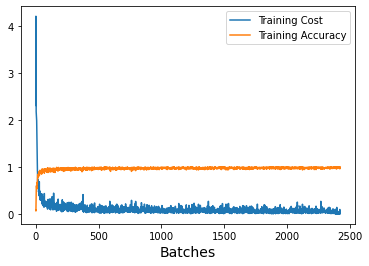

In [ ]:
fig = plt.figure()
plt.xlabel('Batches', fontsize=14)
plt.plot(loss_list, label = 'Training Cost')
plt.plot(acc_list, label = 'Training Accuracy')
plt.legend()

469


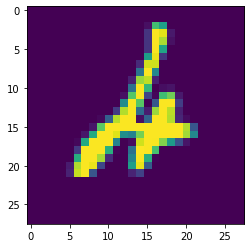

Predicted Digit = 4


In [ ]:
test = DataLoader(dataset=test_dataset, batch_size=10000, shuffle=False)
images, labels = next(iter(test))
print(len(train_loader))
i=247
img = images[i]
with torch.no_grad():
    logps = model(images)
plt.imshow(img[0])
plt.show()
ps = torch.exp(logps)
probab = list(ps.numpy()[i])
print("Predicted Digit =", probab.index(max(probab)))